In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [31]:
try:
    %pip install seaborn
except OSError:
    print("Installation failed. Check platform or permissions.")

In [40]:
Distribution_data = pd.read_csv('ev_distribution_dataset.csv')
Weather_data = pd.read_csv('weather_dataset.csv')
geospatial_data = pd.read_csv('geospatial_dataset.csv')

In [41]:
Distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [34]:
Weather_data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


In [35]:
geospatial_data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [43]:
Distribution_data.info()
Distribution_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 23.5+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [18]:
Weather_data.info()
Weather_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.7+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


In [37]:
geospatial_data.info()
geospatial_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 872.0+ bytes


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


# Exploratory Data Analysis
This Phase involves both Univariate and Bivariate Analysis
Univariate Analysis
1. Visualize the distribution of electricity consumption.
2. Analyze the distribution of EV types, charging habits, customer type.
Bivariate Analysis
3. Use geospatial data to visualize the locations of substations and EV charging stations.
4. Analyze the capacity of transmission lines.

<ipython-input-50-2859757f2586>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Distribution_data, y="EV_Type", ax=axes[0, 1], palette=custom_palette)
<ipython-input-50-2859757f2586>:18: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(data=Distribution_data, y="EV_Type", ax=axes[0, 1], palette=custom_palette)
<ipython-input-50-2859757f2586>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Distribution_data, y="Charging_Habit", ax=axes[1, 0], palette=custom_palette)
<ipython-input-50-2859757f2586>:25: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(dat

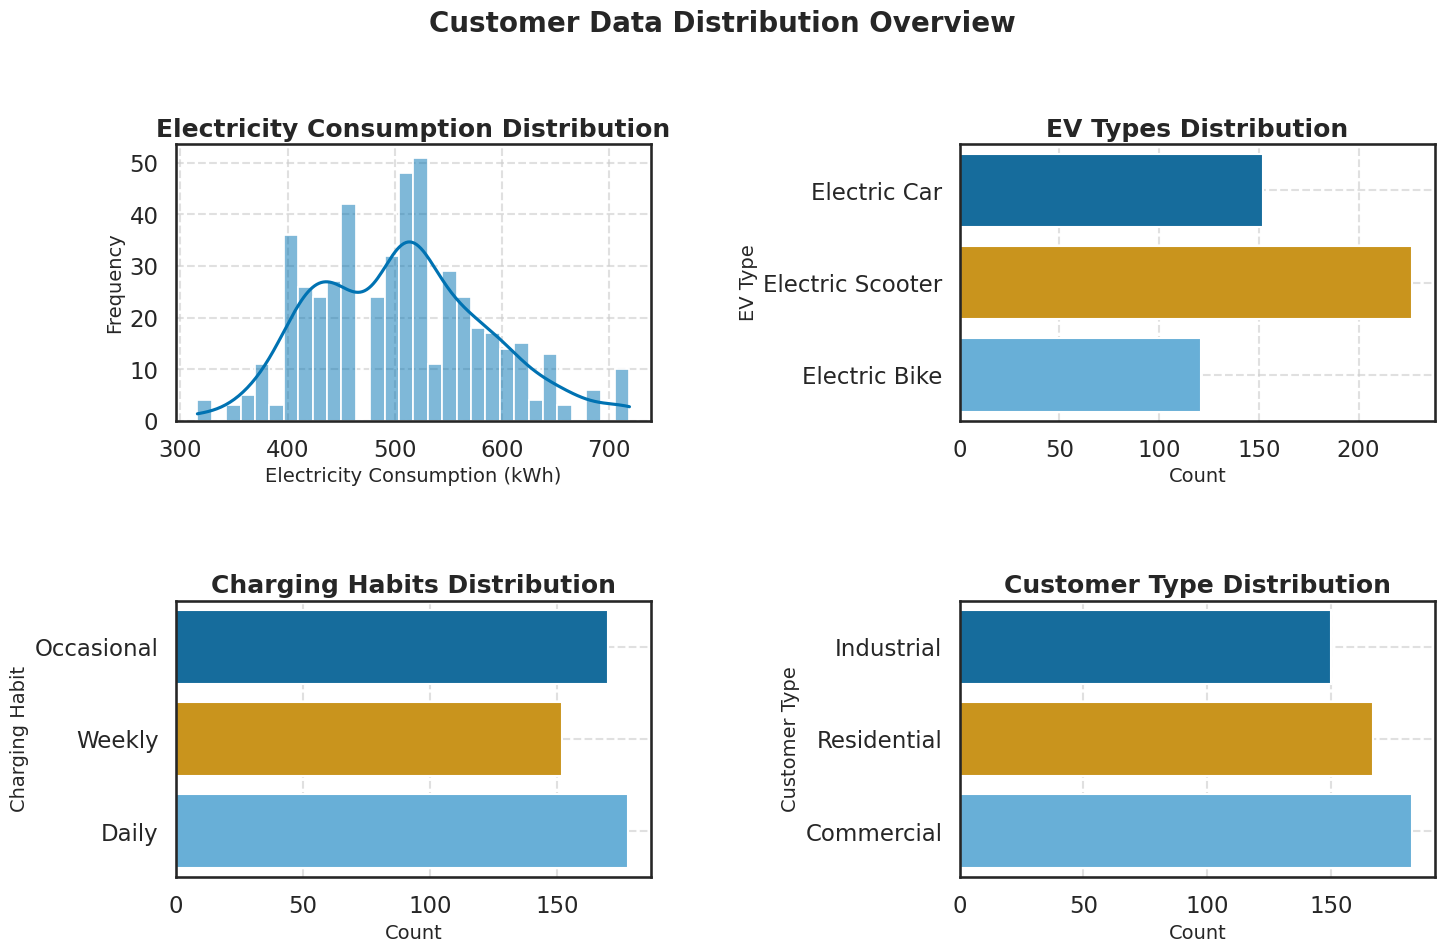

In [50]:

# Set the overall aesthetic with a sleek, minimalistic design
sns.set(style="white", context="talk")

# Define a sophisticated, modern color palette
custom_palette = sns.color_palette(["#0072B2", "#E69F00", "#56B4E9", "#009E73"])

# Create a 2x2 subplot grid with specific figure size
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Distribution of Electricity Consumption with gridlines
sns.histplot(data=Distribution_data, x="Electricity_Consumption (kWh)", bins=30, kde=True, ax=axes[0, 0], color=custom_palette[0])
axes[0, 0].set_title("Electricity Consumption Distribution", fontsize=18, weight='bold')
axes[0, 0].set_xlabel("Electricity Consumption (kWh)", fontsize=14)
axes[0, 0].set_ylabel("Frequency", fontsize=14)
axes[0, 0].grid(True, linestyle="--", alpha=0.6)

# Plot 2: Distribution of EV Types with custom color palette
sns.countplot(data=Distribution_data, y="EV_Type", ax=axes[0, 1], palette=custom_palette)
axes[0, 1].set_title("EV Types Distribution", fontsize=18, weight='bold')
axes[0, 1].set_xlabel("Count", fontsize=14)
axes[0, 1].set_ylabel("EV Type", fontsize=14)
axes[0, 1].grid(True, linestyle="--", alpha=0.6)

# Plot 3: Distribution of Charging Habits with refined palette
sns.countplot(data=Distribution_data, y="Charging_Habit", ax=axes[1, 0], palette=custom_palette)
axes[1, 0].set_title("Charging Habits Distribution", fontsize=18, weight='bold')
axes[1, 0].set_xlabel("Count", fontsize=14)
axes[1, 0].set_ylabel("Charging Habit", fontsize=14)
axes[1, 0].grid(True, linestyle="--", alpha=0.6)

# Plot 4: Distribution of Customer Types with sleek color scheme
sns.countplot(data=Distribution_data, y="Customer_Type", ax=axes[1, 1], palette=custom_palette)
axes[1, 1].set_title("Customer Type Distribution", fontsize=18, weight='bold')
axes[1, 1].set_xlabel("Count", fontsize=14)
axes[1, 1].set_ylabel("Customer Type", fontsize=14)
axes[1, 1].grid(True, linestyle="--", alpha=0.6)

# Adjust the layout to ensure everything is neatly aligned
plt.tight_layout(pad=3.5)

# Add a common title for the entire figure
fig.suptitle("Customer Data Distribution Overview", fontsize=20, weight='bold', y=1.02)

# Show the plots
plt.show()


In [53]:
# Extract Lat and Long for EV charging stations
Distribution_data['ev_latitude'] = Distribution_data['EV_Charging_Station_Location'].apply(
    lambda x: float(x.split(",")[0].replace("(", "").strip())
)
Distribution_data['ev_longitude'] = Distribution_data['EV_Charging_Station_Location'].apply(
    lambda x: float(x.split(",")[1].replace(")", "").strip())
)

# Extract Lat and Long for substation location
geospatial_data['substation_latitude'] = geospatial_data['Substation_Location'].apply(
    lambda x: float(x.split(",")[0].replace("(", "").strip())
)
geospatial_data['substation_longitude'] = geospatial_data['Substation_Location'].apply(
    lambda x: float(x.split(",")[1].replace(")", "").strip())
)

# Drop the original Location columns to clean up the dataframes
Distribution_data = Distribution_data.drop(columns=['EV_Charging_Station_Location'])
geospatial_data = geospatial_data.drop(columns=['Substation_Location'])

In [59]:
Distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [58]:
geospatial_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


<ipython-input-67-609a4ab83094>:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


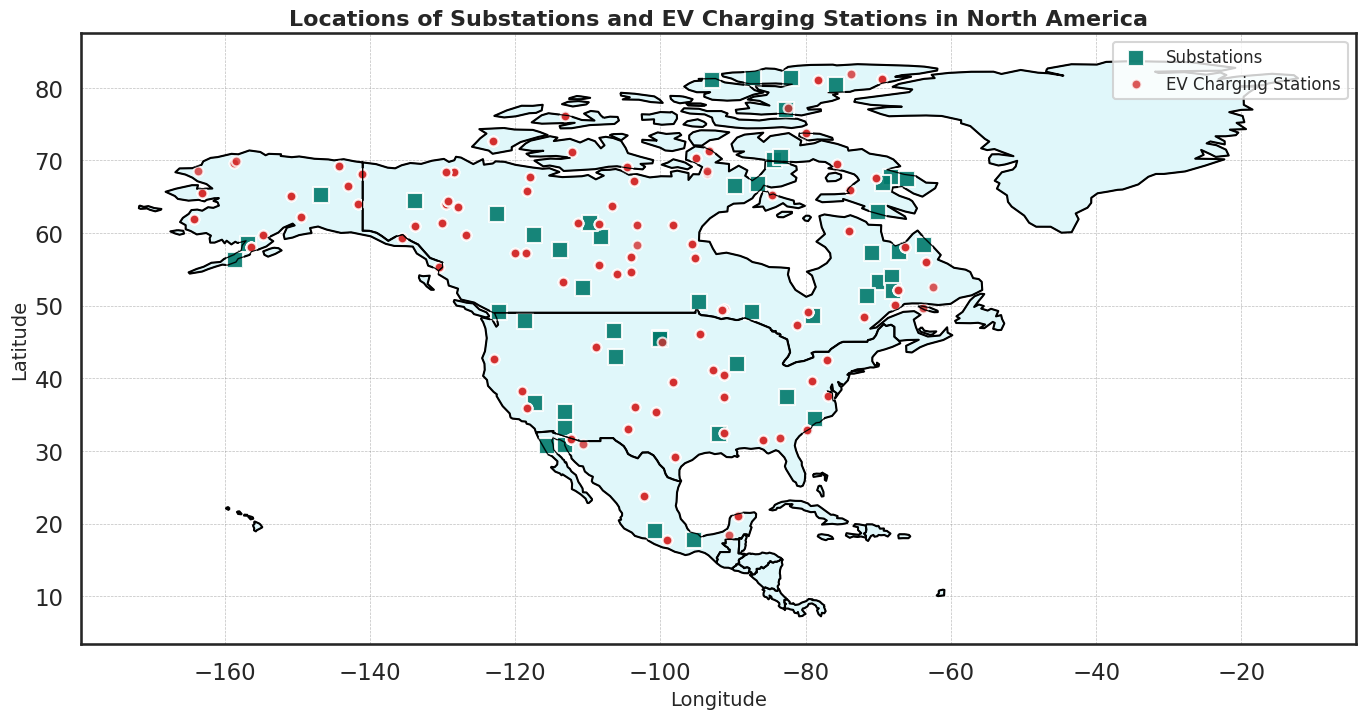

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert the dataframes to GeoDataFrames
ev_gdf = gpd.GeoDataFrame(
    Distribution_data,
    geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude)
)

substation_gdf = gpd.GeoDataFrame(
    geospatial_data,
    geometry=gpd.points_from_xy(geospatial_data.substation_longitude, geospatial_data.substation_latitude)
)

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter to North America
north_america = world[world['continent'] == 'North America']

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the North America boundaries
north_america.boundary.plot(ax=ax, linewidth=0.8, color='black')

# Fill North America with a subtle color
north_america.plot(ax=ax, color='#E0F7FA', edgecolor='black')  # Light cyan

# Plot substations with square markers
substation_gdf.plot(
    ax=ax,
    marker='s',
    markersize=120,
    color='#00796B',  # Teal
    label='Substations',
    alpha=0.9,
    edgecolor='white'
)

# Plot EV charging stations with circular markers
ev_gdf.plot(
    ax=ax,
    markersize=50,
    color='#D32F2F',  # Dark red
    label='EV Charging Stations',
    alpha=0.8,
    edgecolor='white'
)

# Set title and axis labels with better font settings
plt.title('Locations of Substations and EV Charging Stations in North America', fontsize=16, fontweight='bold')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Add grid for better readability
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add legend and format the layout
plt.legend(loc='upper right', fontsize=12, frameon=True)
plt.tight_layout()

# Save the plot as a high-resolution image
plt.savefig('substations_ev_charging_stations_map.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


<ipython-input-70-c0ffed22d83d>:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


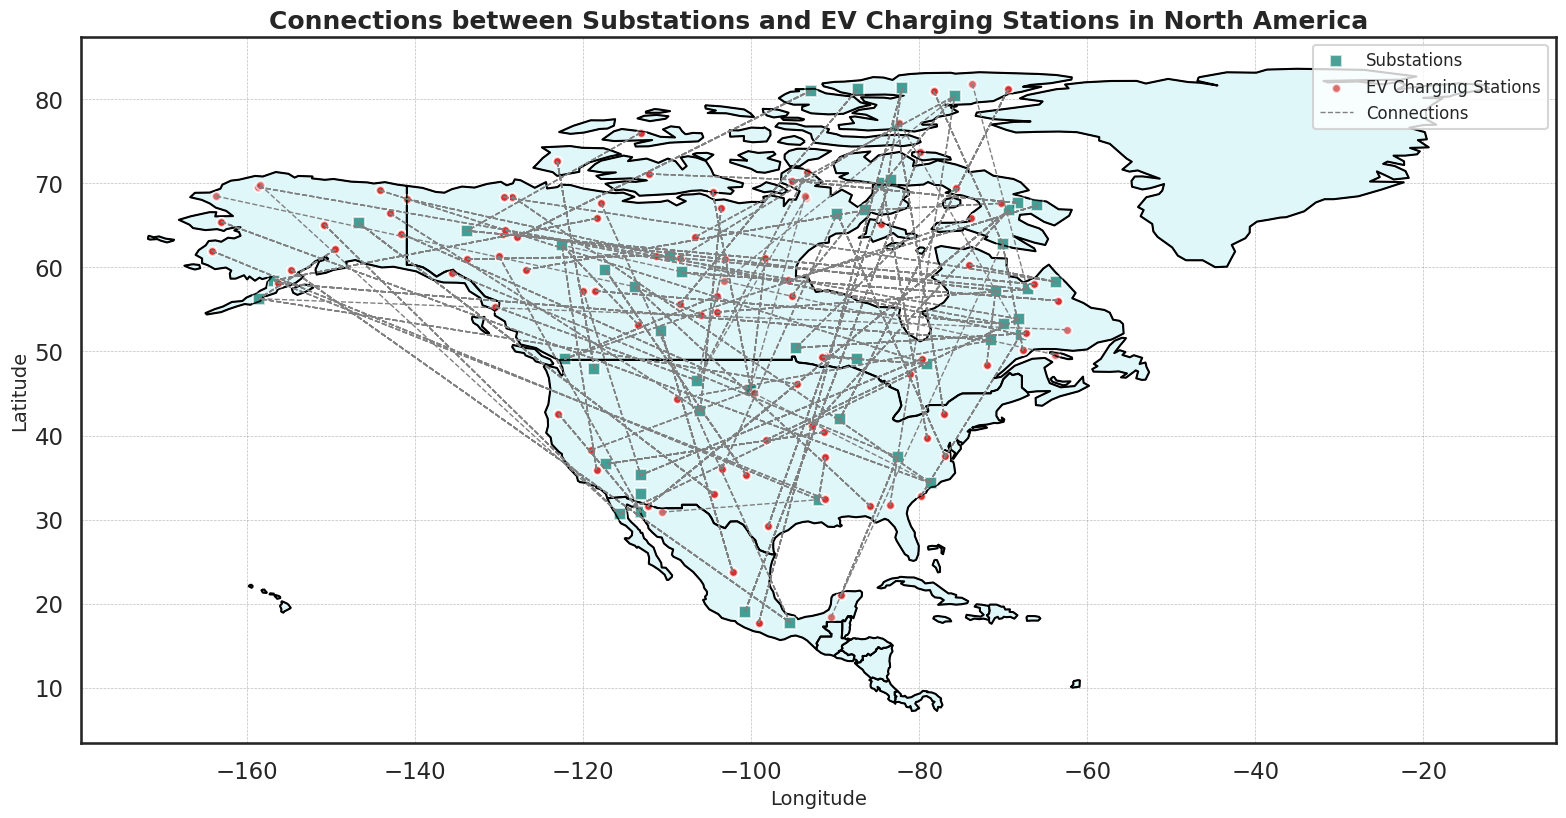

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Convert the dataframes to GeoDataFrames
ev_gdf = gpd.GeoDataFrame(
    Distribution_data,
    geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude)
)

substation_gdf = gpd.GeoDataFrame(
    geospatial_data,
    geometry=gpd.points_from_xy(geospatial_data.substation_longitude, geospatial_data.substation_latitude)
)

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter to North America
north_america = world[world['continent'] == 'North America']

# Create lines connecting each substation to its associated EV charging station
lines = []
for _, ev_row in Distribution_data.iterrows():
    substation = geospatial_data[geospatial_data['Substation_ID'] == ev_row['Substation_ID']].iloc[0]
    line = [(ev_row['ev_longitude'], ev_row['ev_latitude']),
            (substation['substation_longitude'], substation['substation_latitude'])]
    lines.append(LineString(line))

# Create a GeoDataFrame containing the lines
line_gdf = gpd.GeoDataFrame(geometry=lines)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot North America boundaries
north_america.boundary.plot(ax=ax, linewidth=0.8, color='black')

# Fill North America with a subtle color
north_america.plot(ax=ax, color='#E0F7FA', edgecolor='black')  # Light cyan

# Plot substations with smaller square markers
substation_gdf.plot(
    ax=ax,
    marker='s',
    markersize=80,
    color='#00796B',  # Teal
    label='Substations',
    alpha=0.7,
    edgecolor='white'
)

# Plot EV charging stations with smaller circular markers
ev_gdf.plot(
    ax=ax,
    markersize=40,
    color='#D32F2F',  # Dark red
    label='EV Charging Stations',
    alpha=0.7,
    edgecolor='white'
)

# Plot lines connecting substations to EV charging stations with dashed lines
line_gdf.plot(ax=ax, linewidth=1.0, color='grey', linestyle='--', label='Connections')

# Set title and axis labels with better font settings
plt.title('Connections between Substations and EV Charging Stations in North America', fontsize=18, fontweight='bold')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Add grid for better readability
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add legend and format the layout
plt.legend(loc='upper right', fontsize=12, frameon=True)
plt.tight_layout()

# Save the plot as a high-resolution image
plt.savefig('substations_ev_charging_stations_map.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


<ipython-input-126-ba9736fbf5ad>:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


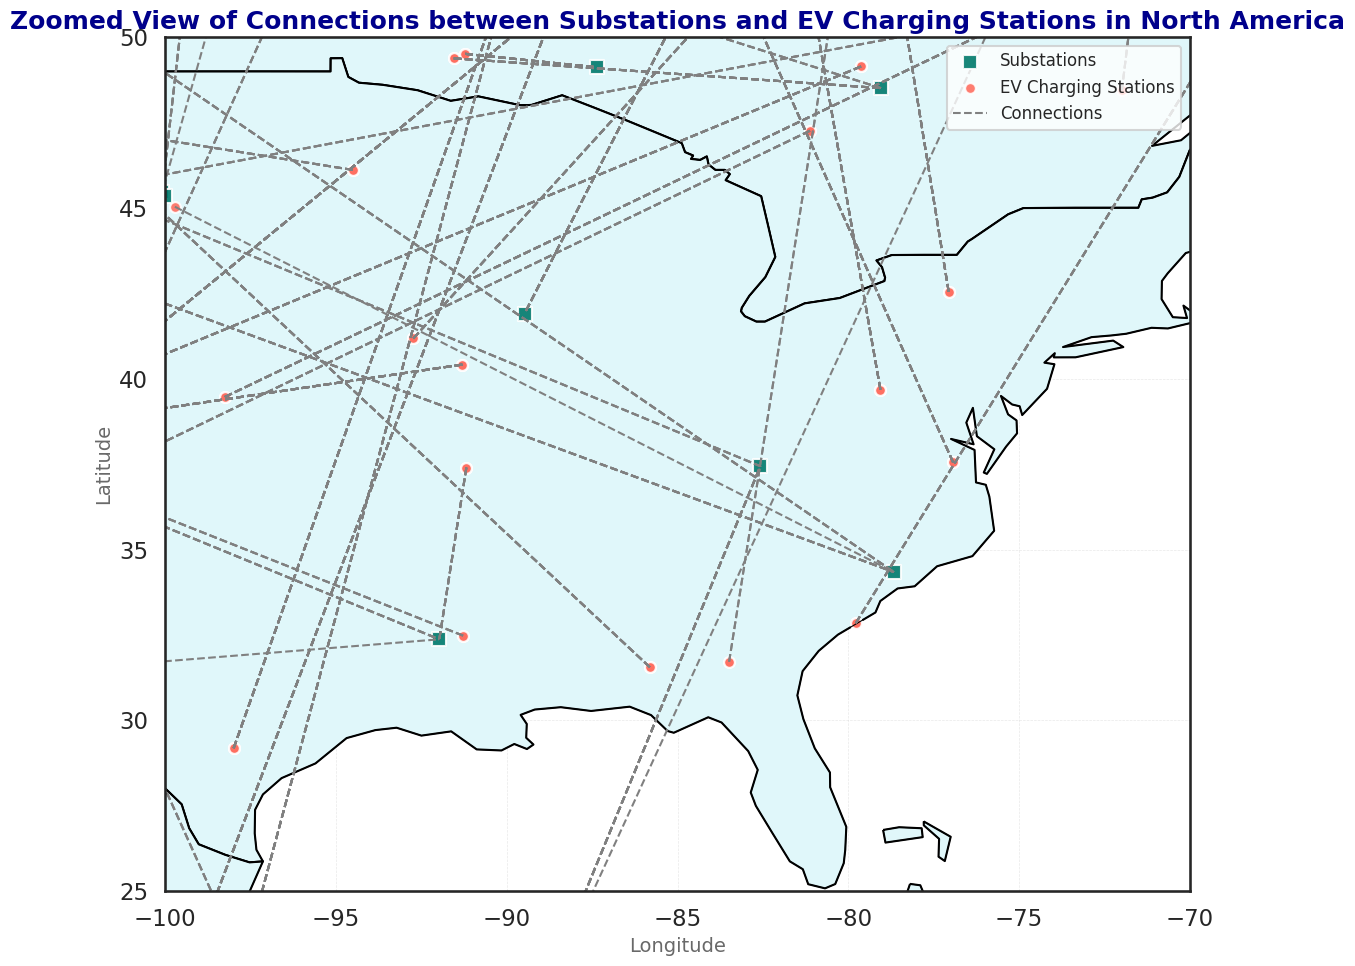

In [126]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Convert the dataframes to GeoDataFrames
ev_gdf = gpd.GeoDataFrame(
    Distribution_data,
    geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude)
)

substation_gdf = gpd.GeoDataFrame(
    geospatial_data,
    geometry=gpd.points_from_xy(geospatial_data.substation_longitude, geospatial_data.substation_latitude)
)

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter to North America
north_america = world[world['continent'] == 'North America']

# Create lines connecting each substation to its associated EV charging station
lines = []
for _, ev_row in Distribution_data.iterrows():
    substation = geospatial_data[geospatial_data['Substation_ID'] == ev_row['Substation_ID']].iloc[0]
    line = [(ev_row['ev_longitude'], ev_row['ev_latitude']),
            (substation['substation_longitude'], substation['substation_latitude'])]
    lines.append(LineString(line))

# Create a GeoDataFrame containing the lines
line_gdf = gpd.GeoDataFrame(geometry=lines)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot North America boundaries
north_america.boundary.plot(ax=ax, linewidth=0.8, color='black')

# Fill North America with a subtle color
north_america.plot(ax=ax, color='#E0F7FA', edgecolor='black')  # Light cyan

# Plot substations with smaller square markers
substation_gdf.plot(
    ax=ax,
    marker='s',
    markersize=100,  # Increased marker size for better visibility
    color='#00796B',  # Teal
    label='Substations',
    alpha=0.9,
    edgecolor='white'
)

# Plot EV charging stations with smaller circular markers
ev_gdf.plot(
    ax=ax,
    markersize=60,  # Increased marker size for better visibility
    color='#FF6F61',  # Coral for EV Charging Stations
    label='EV Charging Stations',
    alpha=0.9,
    edgecolor='white'
)

# Plot lines connecting substations to EV charging stations with dashed lines
line_gdf.plot(ax=ax, linewidth=1.5, color='grey', linestyle='--', label='Connections')

# Set title and axis labels with better font settings
plt.title('Zoomed View of Connections between Substations and EV Charging Stations in North America', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Longitude', fontsize=14, color='dimgray')
plt.ylabel('Latitude', fontsize=14, color='dimgray')

# Set limits to zoom in (adjust these values based on your desired area)
ax.set_xlim(-100, -70)  # Tighter limits for more zoom
ax.set_ylim(25, 50)      # Tighter limits for more zoom

# Add grid for better readability
ax.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add legend and format the layout
plt.legend(loc='upper right', fontsize=12, frameon=True)

# Format the layout
plt.tight_layout()

# Save the plot as a high-resolution image
plt.savefig('substations_ev_charging_stations_map_zoomed_clear.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


<ipython-input-125-8f272b4bbb50>:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


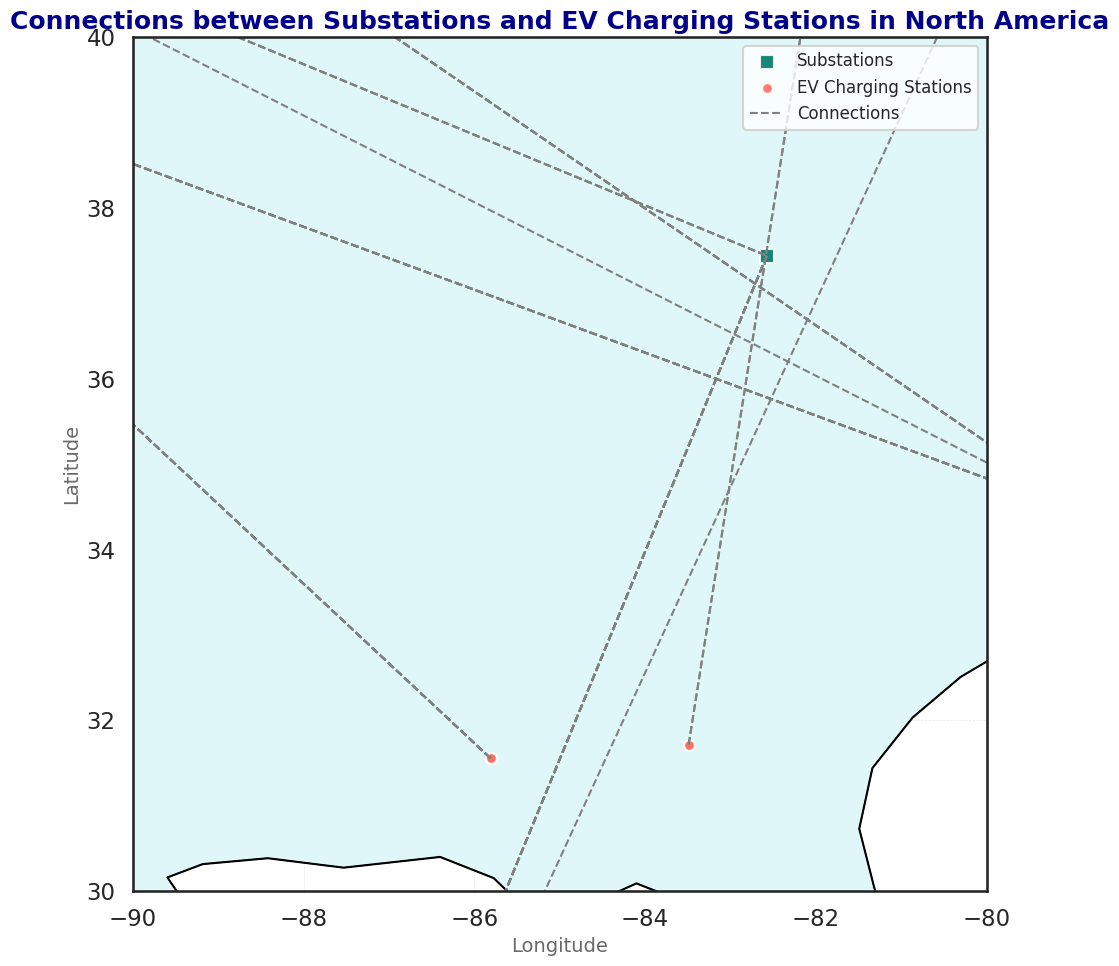

In [125]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Convert the dataframes to GeoDataFrames
ev_gdf = gpd.GeoDataFrame(
    Distribution_data,
    geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude)
)

substation_gdf = gpd.GeoDataFrame(
    geospatial_data,
    geometry=gpd.points_from_xy(geospatial_data.substation_longitude, geospatial_data.substation_latitude)
)

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter to North America
north_america = world[world['continent'] == 'North America']

# Create lines connecting each substation to its associated EV charging station
lines = []
for _, ev_row in Distribution_data.iterrows():
    substation = geospatial_data[geospatial_data['Substation_ID'] == ev_row['Substation_ID']].iloc[0]
    line = [(ev_row['ev_longitude'], ev_row['ev_latitude']),
            (substation['substation_longitude'], substation['substation_latitude'])]
    lines.append(LineString(line))

# Create a GeoDataFrame containing the lines
line_gdf = gpd.GeoDataFrame(geometry=lines)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot North America boundaries
north_america.boundary.plot(ax=ax, linewidth=0.8, color='black')

# Fill North America with a subtle color
north_america.plot(ax=ax, color='#E0F7FA', edgecolor='black')  # Light cyan

# Plot substations with smaller square markers
substation_gdf.plot(
    ax=ax,
    marker='s',
    markersize=100,  # Increased marker size for better visibility
    color='#00796B',  # Teal
    label='Substations',
    alpha=0.9,
    edgecolor='white'
)

# Plot EV charging stations with smaller circular markers
ev_gdf.plot(
    ax=ax,
    markersize=60,  # Increased marker size for better visibility
    color='#FF6F61',  # Coral for EV Charging Stations
    label='EV Charging Stations',
    alpha=0.9,
    edgecolor='white'
)

# Plot lines connecting substations to EV charging stations with dashed lines
line_gdf.plot(ax=ax, linewidth=1.5, color='grey', linestyle='--', label='Connections')

# Set title and axis labels with better font settings
plt.title('Connections between Substations and EV Charging Stations in North America', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Longitude', fontsize=14, color='dimgray')
plt.ylabel('Latitude', fontsize=14, color='dimgray')

# Set limits to zoom in further (adjust these values based on the specific area)
ax.set_xlim(-90, -80)  # Example limits for tighter zoom
ax.set_ylim(30, 40)     # Example limits for tighter zoom

# Add grid for better readability
ax.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add legend and format the layout
plt.legend(loc='upper right', fontsize=12, frameon=True)

# Format the layout
plt.tight_layout()

# Save the plot as a high-resolution image
plt.savefig('substations_ev_charging_stations_map_zoomed_clear.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


<ipython-input-124-9e4de28c31bb>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


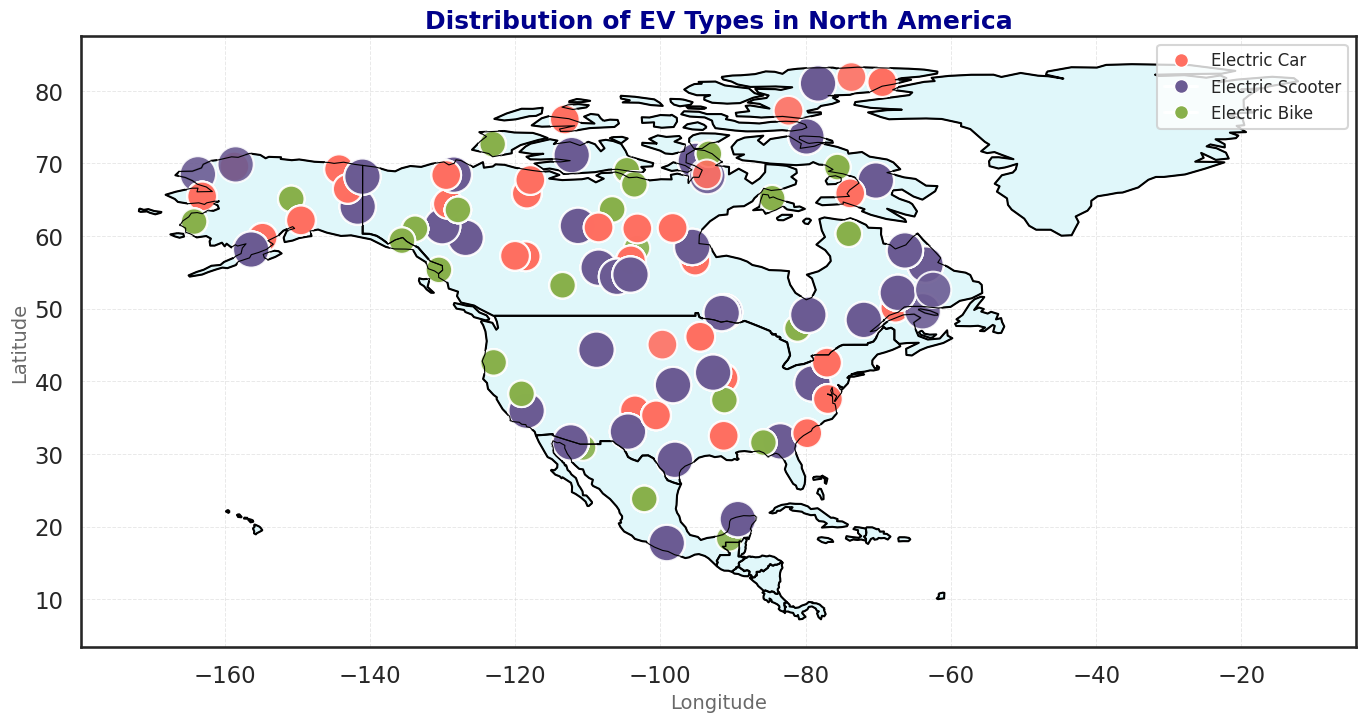

In [124]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert the dataframes to GeoDataFrames
ev_gdf = gpd.GeoDataFrame(
    Distribution_data,
    geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude)
)

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter to North America
north_america = world[world['continent'] == 'North America']

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the North America boundaries
north_america.boundary.plot(ax=ax, linewidth=0.8, color='black')

# Fill North America with a subtle color
north_america.plot(ax=ax, color='#E0F7FA', edgecolor='black')  # Light cyan

# Define colors for different EV types with a more vibrant palette
colors = {
    'Electric Car': '#FF6F61',  # Coral
    'Electric Scooter': '#6B5B93',  # Lavender
    'Electric Bike': '#88B04B'   # Olive green
}

# Map colors to EV types
ev_gdf['color'] = ev_gdf['EV_Type'].map(colors)

# Calculate size based on density (e.g., count of EVs per type)
ev_counts = ev_gdf['EV_Type'].value_counts()
size_map = ev_gdf['EV_Type'].map(ev_counts) * 3  # Adjusted multiplier for size

# Plot EV charging stations with circular markers based on their type and density
ev_gdf.plot(
    ax=ax,
    markersize=size_map,  # Size based on density
    color=ev_gdf['color'],
    alpha=0.9,  # Increased opacity for better visibility
    edgecolor='white'
)

# Set title and axis labels with improved font settings
plt.title('Distribution of EV Types in North America', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Longitude', fontsize=14, color='dimgray')
plt.ylabel('Latitude', fontsize=14, color='dimgray')

# Add grid for better readability
ax.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.5)

# Create custom legend for EV types
handles = [plt.Line2D([0], [0], marker='o', color='w', label=ev_type,
                       markerfacecolor=color, markersize=10) for ev_type, color in colors.items()]

# Add legend for EV types
plt.legend(handles=handles, loc='upper right', fontsize=12, frameon=True)

# Format the layout
plt.tight_layout()

# Display the plot
plt.show()


# NETWORK CAPACITY ASSESSMENT

To perform network capacity assessment:

Calculate the total electricity consumption for each substation.
Compare the total electricity consumption with the transmission line capacity.


In [99]:

# Grouping the EV distribution data by Substation ID and calculating total electricity consumption for each substation
total_consumption_per_substation = Distribution_data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

# Merging the total consumption data with the geospatial data
network_capacity_data = pd.merge(geospatial_data, total_consumption_per_substation, on='Substation_ID')

# Renaming columns for better understanding
network_capacity_data.rename(columns={'Electricity_Consumption (kWh)': 'Total Consumption (kWh)'}, inplace=True)

# Check if the Transmission_Line_Capacity column exists
if 'Transmission_Line_Capacity' in network_capacity_data.columns:
    # Calculating the ratio of total consumption to transmission line capacity
    # Conversion: 1 MW = 1000 kWh
    network_capacity_data['Consumption_to_Capacity_Ratio'] = network_capacity_data['Total Consumption (kWh)'] / (network_capacity_data['Transmission_Line_Capacity'] * 1000)
else:
    print("Warning: 'Transmission_Line_Capacity' column is missing.")




In [101]:
# Print the resulting DataFrame to check the calculations
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total Consumption (kWh)
0,Substation_907,40,57.258136,-70.905820,6663.768920
1,Substation_218,71,70.025385,-84.380572,5997.437051
2,Substation_339,85,80.393235,-75.797841,4536.778685
3,Substation_773,10,49.123078,-87.359890,4426.337993
4,Substation_349,40,66.798871,-86.511241,4901.836555


In [105]:
# Grouping the EV distribution data by Substation ID and calculating total electricity consumption for each substation
total_consumption_per_substation = Distribution_data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

# Merging the total consumption data with the geospatial data
network_capacity_data = pd.merge(geospatial_data, total_consumption_per_substation, on='Substation_ID')

# Renaming columns for better understanding
network_capacity_data.rename(columns={'Electricity_Consumption (kWh)': 'Total Consumption (kWh)'}, inplace=True)

# Check if the Transmission_Line_Capacity column exists
if 'Transmission_Line_Capacity' in network_capacity_data.columns:
    # Calculating the ratio of total consumption to transmission line capacity
    # Conversion: 1 MW = 1000 kWh
    network_capacity_data['Consumption_to_Capacity_Ratio'] = (
        network_capacity_data['Total Consumption (kWh)'] / (network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)
    )
else:
    print("Warning: 'Transmission_Line_Capacity' column is missing.")



In [106]:
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total Consumption (kWh)
0,Substation_907,40,57.258136,-70.905820,6663.768920
1,Substation_218,71,70.025385,-84.380572,5997.437051
2,Substation_339,85,80.393235,-75.797841,4536.778685
3,Substation_773,10,49.123078,-87.359890,4426.337993
4,Substation_349,40,66.798871,-86.511241,4901.836555


In [111]:
# Grouping the EV distribution data by Substation ID and calculating total electricity consumption for each substation
total_consumption_per_substation = Distribution_data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

# Merging the total consumption data with the geospatial data
network_capacity_data = pd.merge(geospatial_data, total_consumption_per_substation, on='Substation_ID')

# Renaming columns for better understanding
network_capacity_data.rename(columns={'Electricity_Consumption (kWh)': 'Total Consumption (kWh)'}, inplace=True)

# Calculating the ratio of total consumption to transmission line capacity
# Conversion: 1 MW = 1000 kWh
network_capacity_data['Consumption_to_Capacity_Ratio'] = network_capacity_data['Total Consumption (kWh)'] / (network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)



In [112]:
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total Consumption (kWh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546


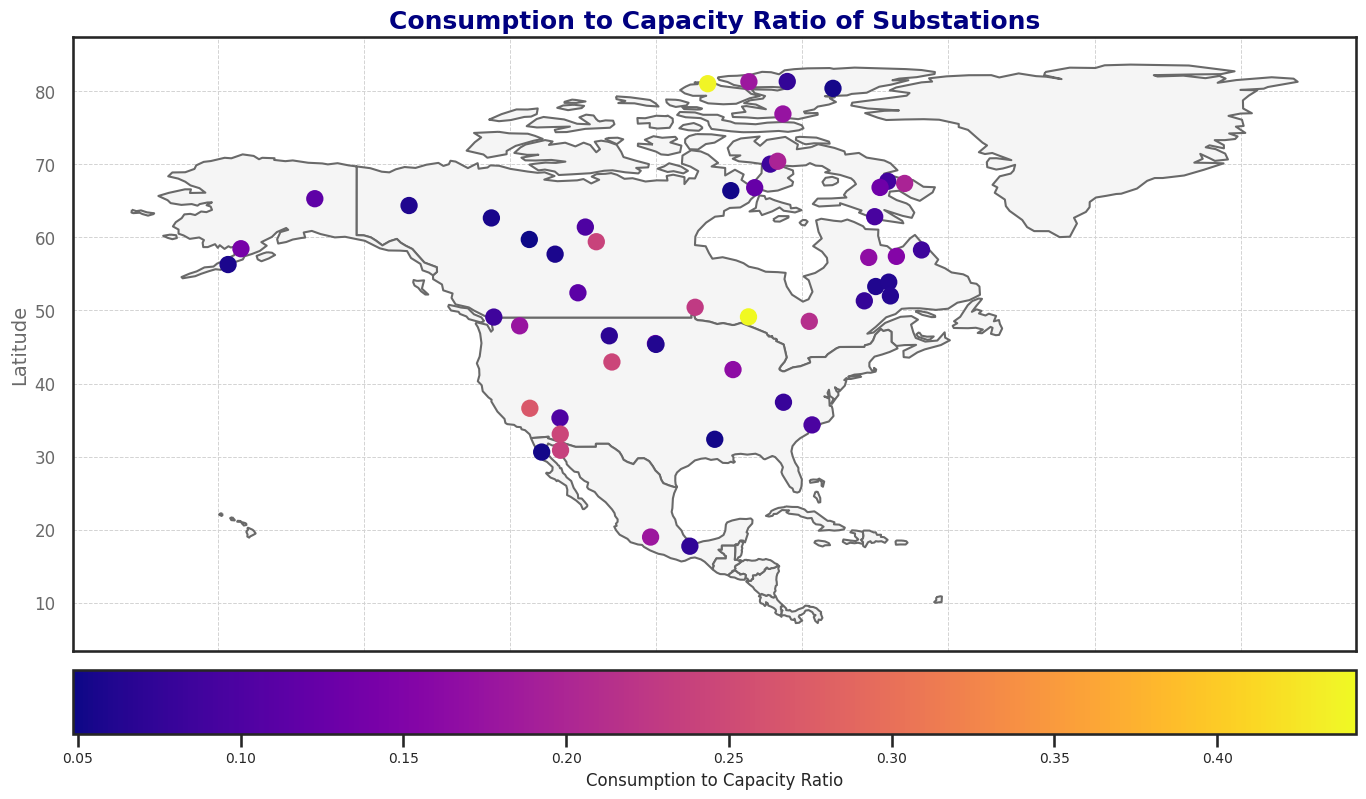

In [122]:
# Create the GeoDataFrame for the network capacity
geometry_network_capacity = [Point(lon, lat) for lon, lat in zip(network_capacity_data['substation_longitude'], network_capacity_data['substation_latitude'])]
gdf_network_capacity = gpd.GeoDataFrame(network_capacity_data, geometry=geometry_network_capacity)

# Plotting in choropleth style
fig, ax = plt.subplots(figsize=(14, 10))

# Plot North America boundaries with a subtle color
north_america.plot(ax=ax, color='whitesmoke', edgecolor='dimgray')

# Plot network capacity data with a vibrant colormap
gdf_network_capacity.plot(
    column='Consumption_to_Capacity_Ratio',
    cmap='plasma',  # A vibrant colormap
    legend=False,  # Disable automatic legend creation
    marker='o',  # Changed marker to circle for a cleaner look
    markersize=120,
    ax=ax
)

# Set titles and labels with improved font styling
ax.set_title("Consumption to Capacity Ratio of Substations", fontsize=18, fontweight='bold', color='navy')
ax.set_xlabel("Longitude", fontsize=14, color='dimgray')
ax.set_ylabel("Latitude", fontsize=14, color='dimgray')

# Customize tick parameters for a cleaner look
ax.tick_params(axis='both', which='major', labelsize=12, colors='dimgray')
ax.tick_params(axis='both', which='minor', labelsize=10, colors='dimgray')

# Add grid lines for better readability
ax.grid(color='lightgray', linestyle='--', linewidth=0.7)

# Create a colorbar manually
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=gdf_network_capacity['Consumption_to_Capacity_Ratio'].min(), vmax=gdf_network_capacity['Consumption_to_Capacity_Ratio'].max()))
sm._A = []  # Create an empty array for the colorbar
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label("Consumption to Capacity Ratio", fontsize=12)
cbar.ax.tick_params(labelsize=10)  # Set the label size of the colorbar

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


In [130]:
# Group by the substation ID for the number of EVs
ev_counts = Distribution_data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()

# Merge network capacity data with EV counts
final_data = pd.merge(ev_counts, network_capacity_data, on='Substation_ID')

# Calculate the correlation coefficient
correlation_ratio = final_data['Number_of_EVs'].corr(final_data['Consumption_to_Capacity_Ratio'])

print("Correlation Ratio:", correlation_ratio)

Correlation Ratio: -0.10944923035990645


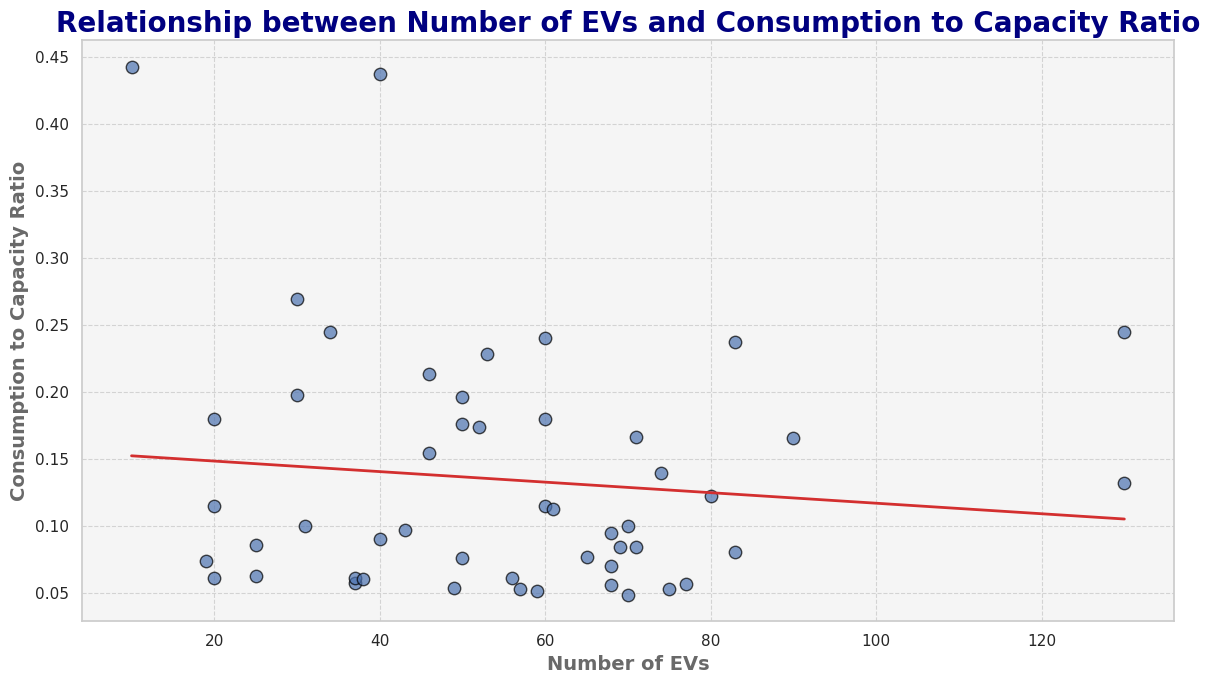

In [132]:
# Set the style for the plot
sns.set(style='whitegrid', palette='deep')

# Create a scatter plot with regression line
plt.figure(figsize=(12, 7))
sns.regplot(
    x='Number_of_EVs',
    y='Consumption_to_Capacity_Ratio',
    data=final_data,
    scatter_kws={'s': 80, 'alpha': 0.7, 'edgecolor': 'black'},  # Adjusted size and added edge color
    line_kws={'color': '#D32F2F', 'linewidth': 2},  # Changed line color to a vibrant red
    ci=None
)

# Set title and labels with improved font settings
plt.title('Relationship between Number of EVs and Consumption to Capacity Ratio', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Number of EVs', fontsize=14, fontweight='bold', color='dimgray')
plt.ylabel('Consumption to Capacity Ratio', fontsize=14, fontweight='bold', color='dimgray')

# Customize grid and background
plt.grid(color='lightgray', linestyle='--', linewidth=0.8)
plt.gca().set_facecolor('whitesmoke')  # Set background color

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


# Identifying Bottlenecks

By analyzing the map, we can identify the substations and areas that are potential bottlenecks in the distribution network. These are the areas where the Consumption_to_Capacity_Ratio is high.

In [134]:
# Filtering c2c greater than 1
bottleneck_substation = network_capacity_data[network_capacity_data['Consumption_to_Capacity_Ratio'] >= 0.9]

In [136]:
# Displaying bottleneck substation
bottleneck_substation.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total Consumption (kWh),Consumption_to_Capacity_Ratio


# Optimizing Network Upgrades:

For optimizing network upgrades, focus on substations with potential to have high Consumption_to_Capacity_Ratio. Upgrading the transmission lines or adding additional capacity in these areas can help in managing the potential to have increased load effectively and ensuring grid reliability.

Additionally, let's note from the analysis:

The Geographical distribution of EV charging stations, where EV charging stations are quite far from the Substations.
Also, let the business look into:

Potential future growth in EV adoption in different areas
Costs associated with different upgrade options

In [139]:
# Top 5 substations with highest Consumption_to_Capacity_Ratio
top_5_substations = network_capacity_data.nlargest(5, 'Consumption_to_Capacity_Ratio')

In [140]:
top_5_substations

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total Consumption (kWh),Consumption_to_Capacity_Ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
14,Substation_87,12,81.031814,-92.941747,5243.800714,0.436983
26,Substation_711,17,36.618181,-117.277556,4579.354677,0.269374
46,Substation_11,43,33.082269,-113.118931,10534.827701,0.244996
41,Substation_258,22,42.952789,-106.049333,5378.214378,0.244464


In [146]:
# Merge weather data with distribution data
merged_data = pd.merge(Distribution_data, Weather_data, on=['Timestamp', 'Substation_ID'])

# Calculate the correlation between weather condition and electricity consumption
correlation_matrix = merged_data[['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']].corr()


In [147]:
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


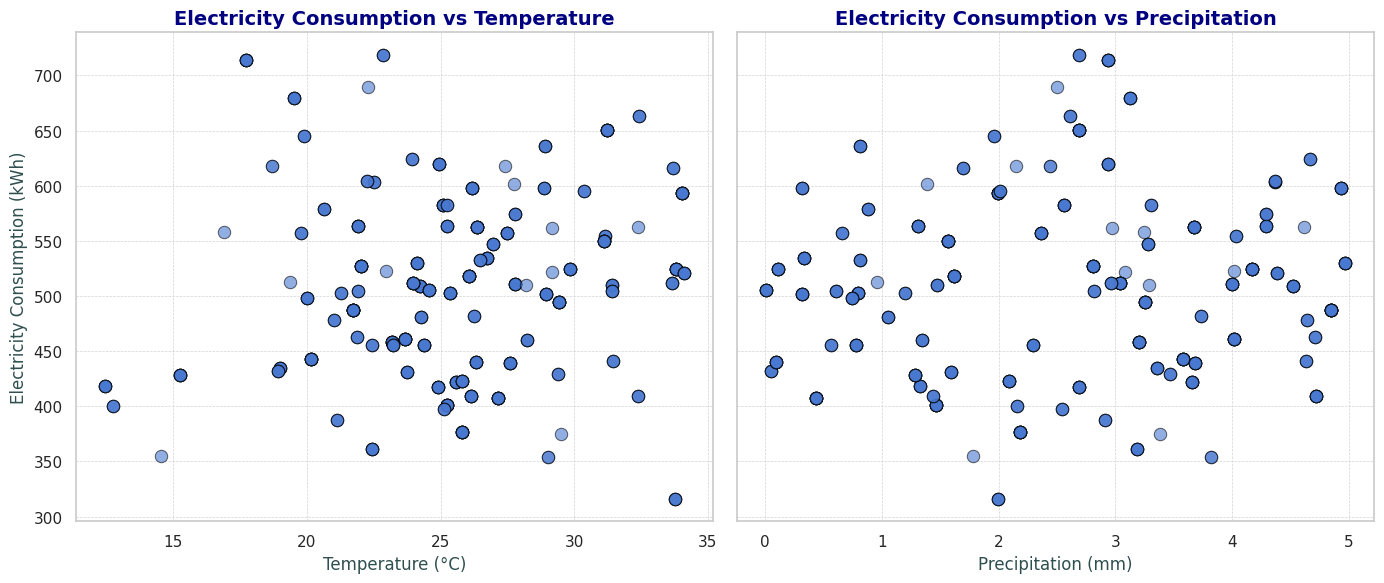

In [151]:

# Set style for consistency
sns.set(style="whitegrid", palette="muted")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # sharey=True to share the y-axis

# Plot 1: Electricity consumption vs temperature
sns.scatterplot(
    data=merged_data, 
    x="Temperature (°C)", 
    y="Electricity_Consumption (kWh)", 
    alpha=0.6, 
    s=80, 
    edgecolor="black", 
    ax=axes[0]  # Assign to the first subplot
)
axes[0].set_title("Electricity Consumption vs Temperature", fontsize=14, fontweight="bold", color='navy')
axes[0].set_xlabel("Temperature (°C)", fontsize=12, color='darkslategray')
axes[0].set_ylabel("Electricity Consumption (kWh)", fontsize=12, color='darkslategray')
axes[0].grid(True, color='lightgray', linestyle='--', linewidth=0.5)

# Plot 2: Electricity consumption vs precipitation
sns.scatterplot(
    data=merged_data, 
    x="Precipitation (mm)", 
    y="Electricity_Consumption (kWh)", 
    alpha=0.6, 
    s=80, 
    edgecolor="black", 
    ax=axes[1]  # Assign to the second subplot
)
axes[1].set_title("Electricity Consumption vs Precipitation", fontsize=14, fontweight="bold", color='navy')
axes[1].set_xlabel("Precipitation (mm)", fontsize=12, color='darkslategray')
axes[1].grid(True, color='lightgray', linestyle='--', linewidth=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


# Insights

Electricity Consumption: The electricity consumption is mostly centered around 500 kWh, with certain instances of higher consumption. This indicates varied demand at different times and locations.

EV Types and Charging Habits: Electric scooters is the most common types of EVs. Most customers charge their EVs daily, indicating a consistent daily load on the distribution network.

Consumer Type: Most Customers are commercial consumers.

Geospatial Distribution: The spatial distribution of substations and EV charging stations is widespread.

Geospatial Distribution: The EV charging station seems to be too far from its corresponding Substation.

Network Capacity: Some substations have a high Consumption_to_Capacity_Ratio, indicating potential bottlenecks and overloads in the network. There is also no correlation with the number of EVs per substation and the Consumption to Capcity Ratio, this shows that Number of EVs is not a factor for overload.

Weather Correlation: The correlation between weather conditions (temperature and precipitation) and electricity consumption is weak in the current dataset, suggesting that other factors might be more influential in affecting electricity consumption.

# The Optimization Strategy/Recommendation

This is based on the analysis done and the business problems at hand, all these should be incorporated into the business.

Prioritize Substation Upgrades: Prioritize upgrades at substations where the Consumption_to_Capacity_Ratio is high, indicating potential overloads. Upgrade the transmission lines because the EV Charging Stations are too far from their corresponding Substations.

Geospatial Analysis for Upgrade Planning: Use geospatial analysis to determine the optimal locations for new substations or upgrades to existing ones. Consider factors like the proximity to high load demand areas (areas with high consumption to capacity ratio) and geographical constraints.

Demand Side Management: Implement demand-side management strategies to balance the load on the grid. Encourage customers to charge their EVs during off-peak hours through incentives or dynamic pricing.

Advanced Monitoring and Analytics: Deploy advanced monitoring systems to continuously monitor the health and performance of the distribution network. Use analytics to predict potential issues and take preventive action.

Cost-Benefit Analysis: Conduct a comprehensive cost-benefit analysis for different upgrade options. Consider factors like the cost of upgrades, operational costs, potential revenue from increased capacity, and the impact on service reliability and customer satisfaction.

Customer Engagement: Engage with customers to understand their needs and expectations. Provide clear communication about network upgrades and how they will enhance service reliability and meet the growing demand for EV charging.

Continuous Improvement: Continuously monitor and assess the performance of the distribution network. Gather feedback from customers and other stakeholders, and use this feedback to make further improvements and optimizations.

By following these steps, PowerCharge Utilities can develop an effective optimization strategy to manage the increased load demand from EV charging stations, ensure the reliability and resilience of the distribution network, and meet the expectations of customers, all while optimizing costs and ensuring regulatory compliance.